In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA, FastICA

### Read images from your computer with given path

In [2]:
path = "/home/taguhi/Downloads/lfwcrop_grey/faces/"
image_names = os.listdir(path)[:5000]

In [3]:
imgs = []
for img_name in image_names:
    imgs.append(plt.imread(path+img_name))
    
imgs = np.array(imgs)
imgs = imgs.reshape(imgs.shape[0], imgs.shape[1]*imgs.shape[2])

### Plot some images from the dataset

In [4]:
def plot(num, data, reshape_size=64):
    """
    num: number of examples to plot, up to 10 for optimal layout
    data: data used for plotting, data.shape=(num_rows, num_features)
    reshape_size: to plot images we need 2d data, so reshaping is necessary, 
                default value 28 works for (.,784) images
    """
    fig, axes = plt.subplots(1,num, figsize=(12,8))
    for i,ax in enumerate(axes):
        ax.imshow(data[i].reshape(reshape_size,reshape_size), cmap ='gray')
        ax.axis('off')
    plt.tight_layout()

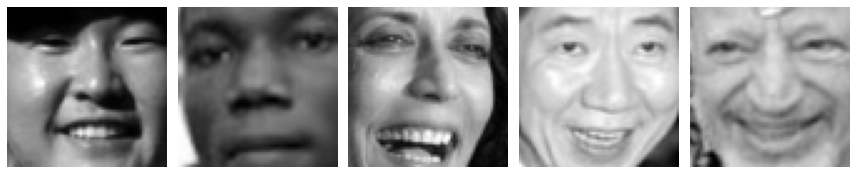

In [5]:
plot(5, imgs)

### Fit PCA on all components and examine explained variance to choose proper number of components

In [6]:
pca = PCA(n_components=4096, random_state=0)
pca.fit(imgs)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.arange(1,4097)


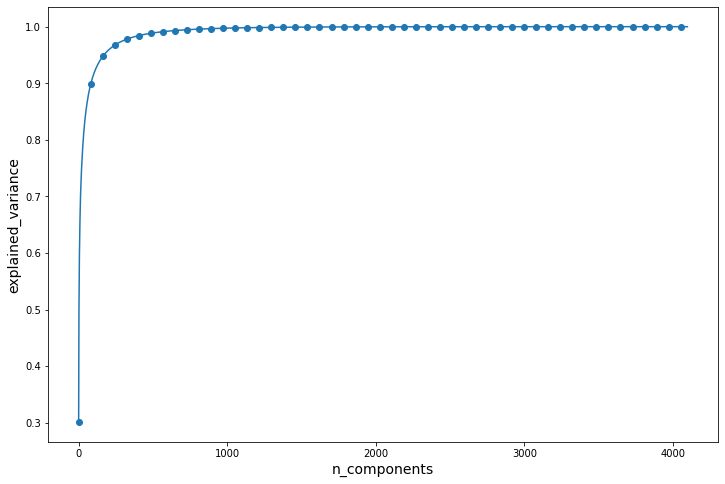

In [7]:
plt.figure(figsize=(12,8))
stride = int(len(np.arange(1,4097)) / 50)
plt.plot(num_components, explained_variance, marker='o', markevery=stride)
plt.xlabel("n_components", fontsize=14)
plt.ylabel("explained_variance", fontsize=14);

In [8]:
ncomps = 500

### Fit PCA on chosen number of components

In [9]:
pca = PCA(n_components = ncomps)
Xpca = pca.fit_transform(imgs)

### Plot first 5 components (eigenvectors)

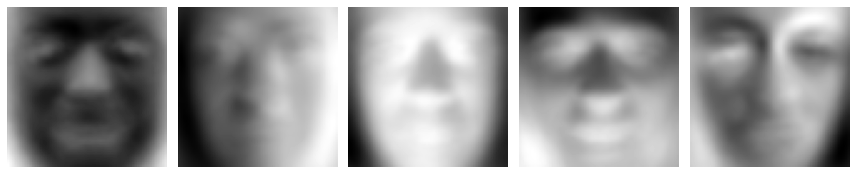

In [10]:
plot(5, pca.components_)

### Inverse transform and plot (just to be sure on reconstruction performance visually)

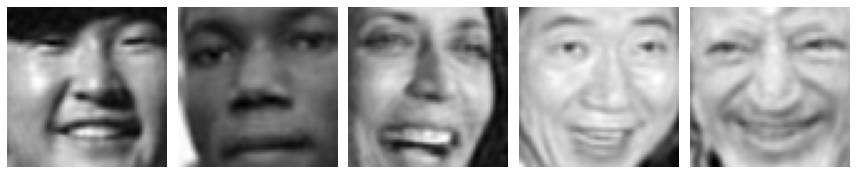

In [11]:
Xpca_inv = pca.inverse_transform(Xpca)
plot(5, Xpca_inv)

### Fit ICA on chosen number of components

In [12]:
ica = FastICA(n_components = ncomps)
Xica = ica.fit_transform(imgs)

/home/taguhi/.virtualenvs/base/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


### Plot first 5 components (eigenvectors)

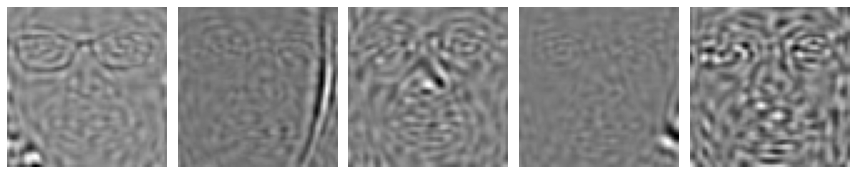

In [13]:
plot(5, ica.components_)

### Inverse transform and plot (just to be sure on reconstruction performance visually)

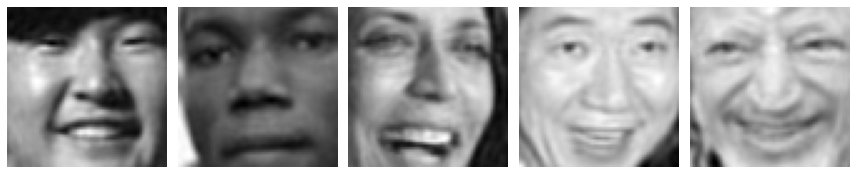

In [14]:
Xica_inv = ica.inverse_transform(Xica)
plot(5, Xica_inv)